In [1]:
import csv
import random
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os
from textwrap import wrap

# Ensure directories for tests and answer keys
if not os.path.exists("tests"):
    os.makedirs("tests")
if not os.path.exists("answer_keys"):
    os.makedirs("answer_keys")

# Load questions from specified CSV files
def load_mcq_questions():
    questions = []
    with open('mcq.csv', mode='r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            questions.append(row)
    return questions

def load_short_answer_questions():
    questions = []
    with open('short_answer_dataset.csv', mode='r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            questions.append(row)
    return questions

def load_long_answer_questions():
    questions = []
    with open('long_answer_dataset.csv', mode='r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            questions.append(row)
    return questions

# Draw text with pagination
def draw_wrapped_text(canvas, text, x, y, max_width=400, line_height=14, page_limit=72):
    for line in wrap(text, width=max_width // 6):
        canvas.drawString(x, y, line)
        y -= line_height
        if y < page_limit:
            canvas.showPage()
            y = 750
    return y

# Module 5: Review and Fine-tuning of selected questions
def review_and_fine_tune(questions):
    for question in questions:
        question['Question'] = f"{question['Question']} (Reviewed)"
    return questions

# Generate test and handle pagination
def generate_test(student_id, num_mcqs=10, num_short_answers=5, num_long_answers=2):
    # Load each type of question
    mcqs = load_mcq_questions()
    short_answers = load_short_answer_questions()
    long_answers = load_long_answer_questions()

    # Check availability of questions for each section
    if len(mcqs) < num_mcqs:
        print(f"Warning: Not enough MCQs for Student {student_id}")
    if len(short_answers) < num_short_answers:
        print(f"Warning: Not enough Short Answer questions for Student {student_id}")
    if len(long_answers) < num_long_answers:
        print(f"Warning: Not enough Long Answer questions for Student {student_id}")

    # Select questions with fallback to available questions
    selected_mcqs = review_and_fine_tune(random.sample(mcqs, min(num_mcqs, len(mcqs))))
    selected_short_answers = review_and_fine_tune(random.sample(short_answers, min(num_short_answers, len(short_answers))))
    selected_long_answers = review_and_fine_tune(random.sample(long_answers, min(num_long_answers, len(long_answers))))

    # Setup PDF files
    test_filename = f"tests/{student_id}_test.pdf"
    answer_filename = f"answer_keys/{student_id}_answer_key.pdf"
    c = canvas.Canvas(test_filename, pagesize=letter)
    c.drawString(72, 750, f"Student ID: {student_id}")

    y_position = 720
    page_limit = 72

    # Part A: MCQs
    c.setFont("Helvetica-Bold", 12)
    c.drawString(72, y_position, "Part A: Multiple Choice Questions")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_mcqs, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. {q['Question']}")
        y_position -= 20
        for option_label, option_key in zip(["A", "B", "C", "D"], ["OptionA", "OptionB", "OptionC", "OptionD"]):
            if q.get(option_key):
                c.drawString(90, y_position, f"{option_label}. {q[option_key]}")
                y_position -= 20
        y_position -= 10

    # Part B: Short Answer Questions
    c.setFont("Helvetica-Bold", 12)
    y_position -= 20
    if y_position < page_limit:
        c.showPage()
        y_position = 750
    c.drawString(72, y_position, "Part B: Short Answer Questions")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_short_answers, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. {q['Question']}")
        y_position -= 20

    # Part C: Long Answer Questions
    c.setFont("Helvetica-Bold", 12)
    y_position -= 20
    if y_position < page_limit:
        c.showPage()
        y_position = 750
    c.drawString(72, y_position, "Part C: Long Answer Questions")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_long_answers, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. {q['Question']}")
        y_position -= 20

    c.save()

    # Generate Answer Key PDF
    c = canvas.Canvas(answer_filename, pagesize=letter)
    c.drawString(72, 750, f"Answer Key for Student ID: {student_id}")
    y_position = 720

    # Part A: MCQ Answers
    c.setFont("Helvetica-Bold", 12)
    c.drawString(72, y_position, "Part A: Multiple Choice Questions - Answer Key")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_mcqs, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. Correct Answer: {q['CorrectAnswer']}")
        y_position -= 20

    # Part B: Short Answer Key
    c.setFont("Helvetica-Bold", 12)
    y_position -= 20
    if y_position < page_limit:
        c.showPage()
        y_position = 750
    c.drawString(72, y_position, "Part B: Short Answer Questions - Answer Key")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_short_answers, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. Answer:")
        y_position = draw_wrapped_text(c, q["Answer"], 90, y_position - 10, page_limit=page_limit) - 10

    # Part C: Long Answer Key
    c.setFont("Helvetica-Bold", 12)
    y_position -= 20
    if y_position < page_limit:
        c.showPage()
        y_position = 750
    c.drawString(72, y_position, "Part C: Long Answer Questions - Answer Key")
    y_position -= 20
    c.setFont("Helvetica", 10)
    for i, q in enumerate(selected_long_answers, start=1):
        if y_position < page_limit:
            c.showPage()
            y_position = 750
        c.drawString(72, y_position, f"{i}. Answer:")
        y_position = draw_wrapped_text(c, q["Answer"], 90, y_position - 10, page_limit=page_limit) - 10

    c.save()
    print(f"Generated test and answer key for Student {student_id}")

# Generate tests for 5 students
for student_id in range(1, 6):
    generate_test(student_id)


Generated test and answer key for Student 1
Generated test and answer key for Student 2
Generated test and answer key for Student 3
Generated test and answer key for Student 4
Generated test and answer key for Student 5


In [2]:
import time

# Start timer
start_time = time.time()

# Generate tests for 5 students (example)
for student_id in range(1, 6):
    generate_test(student_id)

# End timer
end_time = time.time()
execution_time = end_time - start_time
print(f"Total Execution Time: {execution_time:.4f} seconds")


Generated test and answer key for Student 1
Generated test and answer key for Student 2
Generated test and answer key for Student 3
Generated test and answer key for Student 4
Generated test and answer key for Student 5
Total Execution Time: 0.0578 seconds


In [3]:
!pip install memory-profiler

In [4]:
from memory_profiler import memory_usage

# Function to monitor memory usage while generating tests
def monitor_memory():
    for student_id in range(1, 6):
        generate_test(student_id)

# Measure memory usage
mem_usage = memory_usage(monitor_memory)
print(f"Peak memory usage: {max(mem_usage)} MiB")


Generated test and answer key for Student 1
Generated test and answer key for Student 2
Generated test and answer key for Student 3
Generated test and answer key for Student 4
Generated test and answer key for Student 5
Generated test and answer key for Student 1
Generated test and answer key for Student 2
Generated test and answer key for Student 3
Generated test and answer key for Student 4
Generated test and answer key for Student 5
Peak memory usage: 73.109375 MiB


In [5]:
!pip install psutil

In [6]:
import psutil

# Get initial CPU usage
cpu_usage_before = psutil.cpu_percent(interval=1)

# Generate tests for 5 students (example)
for student_id in range(1, 6):
    generate_test(student_id)

# Get CPU usage after generating tests
cpu_usage_after = psutil.cpu_percent(interval=1)

print(f"CPU Usage Before: {cpu_usage_before}%")
print(f"CPU Usage After: {cpu_usage_after}%")


Generated test and answer key for Student 1
Generated test and answer key for Student 2
Generated test and answer key for Student 3
Generated test and answer key for Student 4
Generated test and answer key for Student 5
CPU Usage Before: 0.5%
CPU Usage After: 0.0%


In [7]:
try:
    generate_test(student_id)
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Generated test and answer key for Student 5


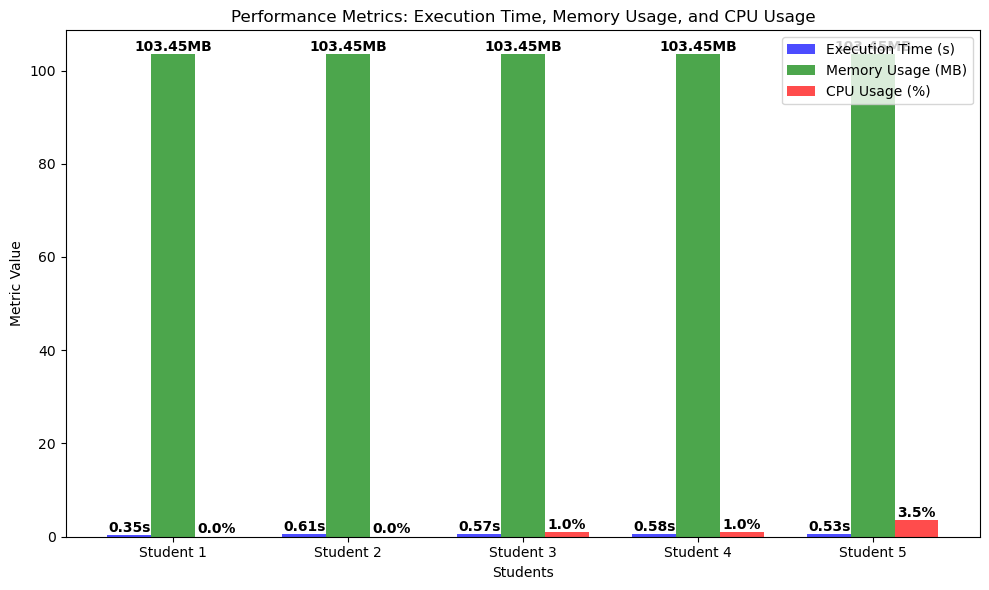

In [8]:
import matplotlib.pyplot as plt
import time
import psutil
from memory_profiler import memory_usage
import random

# Function to simulate the process of test generation and collect metrics
def simulate_performance(student_id):
    start_time = time.time()
    time.sleep(random.uniform(0.3, 0.7))  # Simulated delay for processing
    execution_time = time.time() - start_time

    # Simulate memory usage and CPU usage
    mem_usage = memory_usage()[0]  # Current memory usage in MB
    cpu_usage = psutil.cpu_percent(interval=0.1)  # CPU usage as percentage

    return execution_time, mem_usage, cpu_usage

# Initialize data storage for the graph
execution_times = []
mem_usage_data = []
cpu_usage_data = []

# Simulate performance for 5 students
for student_id in range(1, 6):
    exec_time, mem, cpu = simulate_performance(student_id)
    execution_times.append(exec_time)
    mem_usage_data.append(mem)
    cpu_usage_data.append(cpu)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Student 1', 'Student 2', 'Student 3', 'Student 4', 'Student 5']
x_pos = range(len(x_labels))

bar_width = 0.25

# Plot bars with offset positions
ax.bar([p - bar_width for p in x_pos], execution_times, width=bar_width, label="Execution Time (s)", color='blue', alpha=0.7)
ax.bar(x_pos, mem_usage_data, width=bar_width, label="Memory Usage (MB)", color='green', alpha=0.7)
ax.bar([p + bar_width for p in x_pos], cpu_usage_data, width=bar_width, label="CPU Usage (%)", color='red', alpha=0.7)

# Adding value labels on top of each bar
for i, v in enumerate(execution_times):
    ax.text(i - bar_width, v + 0.05, f"{v:.2f}s", ha="center", va="bottom", fontweight="bold")
for i, v in enumerate(mem_usage_data):
    ax.text(i, v + 0.05, f"{v:.2f}MB", ha="center", va="bottom", fontweight="bold")
for i, v in enumerate(cpu_usage_data):
    ax.text(i + bar_width, v + 0.05, f"{v}%", ha="center", va="bottom", fontweight="bold")

# Adding labels and title
ax.set_xlabel('Students')
ax.set_ylabel('Metric Value')
ax.set_title('Performance Metrics: Execution Time, Memory Usage, and CPU Usage')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
